In [3]:
import tensorflow as tf
import keras
from keras.callbacks import TensorBoard
from keras.utils import plot_model
import numpy as np

Using TensorFlow backend.


In [4]:
import h5py

In [5]:
model = keras.models.load_model("../model/model_wholeSet_normed_c3_f130_e10.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 127, 127, 130)     2730      
_________________________________________________________________
activation_5 (Activation)    (None, 127, 127, 130)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 130)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 130)       67730     
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 130)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 130)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 130)       67730     
__________

In [8]:
#keras.utils.plot_model(model,to_file='test.png')

In [9]:
x_mean = [[1.49880835e+11, 4.40176392e+03 ,2.74842257e-01 ,2.49137578e-01,2.49167977e-01]]
x_range =[2.99999999e+11, 8.00000000e+03 ,4.49999999e-01 ,4.99999586e-01,4.99985816e-01]
y_mean = 1096210.1699824824
y_range = 6727841.0

def get_test_data(x_mean,x_range,y_mean,y_range):
    x_test_raw = np.load("../data/inputMatrix.npz")["inputMatrix"][:]
    y_test_raw = np.load("../data/Solution.npz")["frequency1"][:,:50]
    x_test = (x_test_raw-x_mean)/x_range
    y_test = (y_test_raw-y_mean)/y_range
    return x_test,y_test,x_test_raw,y_test_raw

x_test,y_test,x_test_raw,y_test_raw = get_test_data(x_mean,x_range,y_mean,y_range)

In [10]:
print(x_test.shape)
print(y_test.shape)

(22, 128, 128, 5)
(22, 50)


In [11]:
loss,mae=model.evaluate(x_test,y_test)
print("loss:",loss)
print("MAE:",mae)

C:\Users\xytxy\.conda\envs\ML\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


22/22 [==============================] - 3s 117ms/step
loss: 0.0013233359204605222
MAE: 0.034081198275089264


In [12]:
y_pred_normed = model.predict(x_test)

In [13]:
y_pred_raw = y_pred_normed*y_range+y_mean

In [14]:
y_pred_raw.shape

(22, 50)

In [48]:
y_error = y_pred_raw-y_test_raw
np.set_printoptions(suppress=True)
# print(y_pred_raw[0])
# print(np.real(y_test_raw[
np.unique(x_test_raw[0,:,:,3])

array([0.5])

In [16]:
np.sum(np.absolute(y_pred_raw[0] - y_test_raw[0]))/len(y_test[0])

224788.88

In [20]:
import matplotlib.pyplot as plt

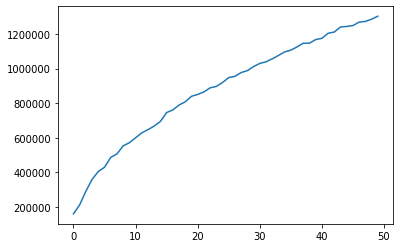

In [26]:
plt.plot(y_pred_raw[21])